In [1]:
%load_ext autoreload
%autoreload 2
import sys
import torch
from torch import nn
sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from pathlib import Path
from typing import Union
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
from ml_utilities.torch_models.base_model import BaseModel
from ml_utilities.torch_models.fc import FC
from ml_utilities.torch_models import get_model_class
from ml_utilities.data_utils import show_images
from erank.data.datasetgenerator import DatasetGenerator
gpu_id = 0

# Datasetgenerator with Augmentations

This notebook serves as demonstration notebook of how to initialize a dataset with augmentations.

In [2]:
data_dir = '/system/user/beck/pwbeck/data'

In [3]:
data_cfg = f"""
data:
  dataset: cifar10 
  dataset_kwargs:
    data_root_path: {data_dir}
  dataset_split:
    train_val_split: 0.8
    # restrict_n_samples_train_task: 100
  dataset_transforms:
    image_transforms:
    - RandomHorizontalFlip
    - RandomCrop:
        size: 32
        padding: 4
    tensor_transforms: 
    joint_tensor_transforms: 
    enable_transforms: True
"""
data_cfg = OmegaConf.create(data_cfg)
print(OmegaConf.to_yaml(data_cfg))

data:
  dataset: cifar10
  dataset_kwargs:
    data_root_path: /system/user/beck/pwbeck/data
  dataset_split:
    train_val_split: 0.8
  dataset_transforms:
    image_transforms:
    - RandomHorizontalFlip
    - RandomCrop:
        size: 32
        padding: 4
    tensor_transforms: null
    joint_tensor_transforms: null
    enable_transforms: true



In [4]:
ds_generator = DatasetGenerator(**data_cfg.data)
ds_generator.generate_dataset()

Files already downloaded and verified


In [5]:
ds_generator.train_split.image_tensor_transforms, ds_generator.train_split.joint_tensor_transforms

(Compose(
     RandomHorizontalFlip(p=0.5)
     RandomCrop(size=(32, 32), padding=4)
     ToTensor()
     Normalize(mean=[0.4913995563983917, 0.48215848207473755, 0.44653093814849854], std=[0.20230084657669067, 0.19941289722919464, 0.20096157491207123])
 ),
 [])

In [6]:
ds_generator.train_split[0][0].shape

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


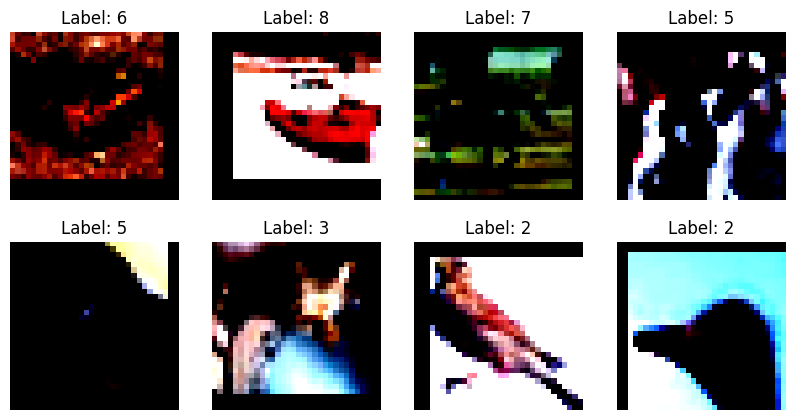

In [7]:
show_images(ds_generator.train_split, 10, shuffle=False)

In [8]:
ds_generator.train_split._composed_image_tensor_transforms

Compose(
    RandomHorizontalFlip(p=0.5)
    RandomCrop(size=(32, 32), padding=4)
    ToTensor()
    Normalize(mean=[0.4913995563983917, 0.48215848207473755, 0.44653093814849854], std=[0.20230084657669067, 0.19941289722919464, 0.20096157491207123])
)